## Genre Classification Of Movies

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np

In [2]:
columns=['Movie Name','Genre','Description']
column=['Movie Name','Description']

In [4]:
# Reading Training Data From Dataset
df_train = pd.read_csv(r'C:\Users\omsha\Desktop\archive\Genre Classification Dataset\train_data.txt', delimiter=':::', engine='python', names=columns, index_col=0)

In [5]:
df_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# Reading Test Data From Dataset
df_test=pd.read_csv(r'C:\Users\omsha\Desktop\archive\Genre Classification Dataset\test_data_solution.txt',delimiter=':::' , engine='python',names=columns,index_col=0)

In [8]:
df_test.head()

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


## DATA PREPROCESSING

In [9]:
# Converting Description column to lowercase in both train and test
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [10]:
print(df_train.columns)
print(df_test.columns)

Index(['Movie Name', 'Genre', 'Description'], dtype='object')
Index(['Movie Name', 'Genre', 'Description'], dtype='object')


In [11]:
#Dropping 'Movie Name' Column from Test And Train
df_train.drop(columns=['Movie Name'], inplace = True)    #inplace=True is used bcz we dont have to create new dataframe
df_test.drop(columns=['Movie Name'], inplace = True)

In [12]:
df_train.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [13]:
df_test.head()

,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [14]:
#Info About Training Data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54214 non-null  object
 1   Description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [15]:
#Info About Test Data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [16]:
# Shape Of both Train And Test Data
print(df_train.shape)
print(df_test.shape)

(54214, 2)
(54200, 2)


## DATA CLEANING

In [17]:
#Printing Duplicate Rows in Taining Data
print("TRAINING DUPLICATES:", df_train.duplicated().sum())  #df_train.duplicated() returns True or false value by checking its upper row

TRAINING DUPLICATES: 110


In [18]:
#Printing Duplicate Rows in Testing Data
print("TESTING DUPLICATES:", df_test.duplicated().sum())

TESTING DUPLICATES: 114


In [19]:
#Dropping Duplicates From Training Data
df_train = df_train.drop_duplicates(keep ='first')

#Dropping Duplicates From Testing Data
df_test = df_test.drop_duplicates(keep = 'first')

In [20]:
#Training Duplicates After Dropping
df_train.duplicated().sum()

#Testing Duplicates After Dropping
df_test.duplicated().sum()

np.int64(0)

In [21]:
# Shape Of both Train And Test Data after removing duplicates
print(df_train.shape)
print(df_test.shape)

(54104, 2)
(54086, 2)


In [22]:
#Seperating Labels And Features From Datasets
x_train_full = df_train['Description']    #Input 
y_train_full = df_train['Genre']          #Target

x_test = df_test['Description']
y_test = df_test['Genre']

In [23]:
#Shape Of Features And Labels Of Training
print(x_train_full.shape)
print(y_train_full.shape)

(54104,)
(54104,)


In [24]:
#Shape Of Features And Labels Of Testing
print(x_test.shape)
print(y_test.shape)

(54086,)
(54086,)


## DATA VISUALIZATION

C:\Users\omsha\AppData\Local\Temp\ipykernel_6040\1192606126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='Greys') #sns.countplot shows bar graph of count at each genre


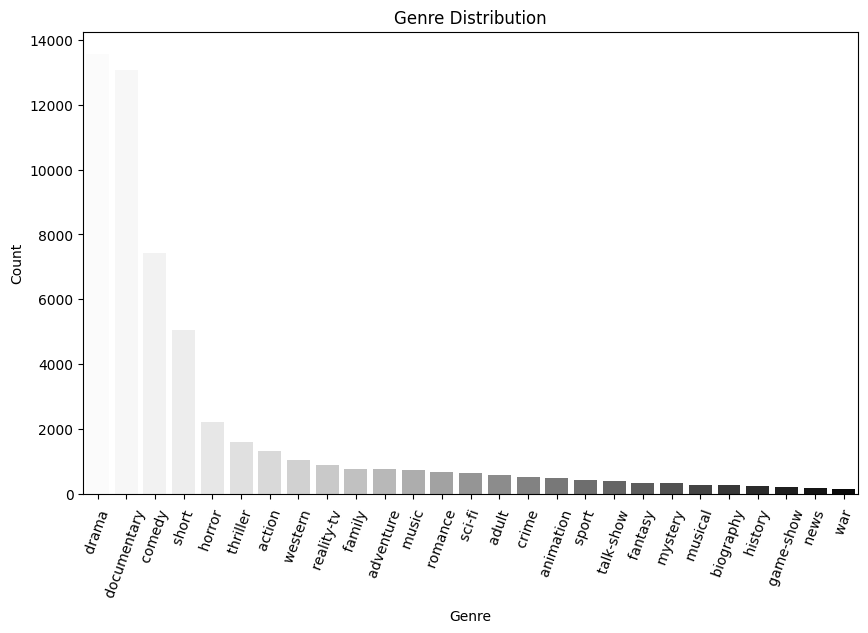

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting Genre Vs Count Of Movies In That Genre
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='Greys') #sns.countplot shows bar graph of count at each genre
# order=df_train['Genre'].value_counts().index, used to show genre having max count showing first
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

## DATA SPLITTING

In [27]:
# Importing Dependencies For Train Test Split
from sklearn.model_selection import train_test_split

#Splitting Training Data Into Training And Validation
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=1)  #Random_state is used for maintaing consistency in output

In [28]:
#Displaying Shapes Of Training,Validation and Test Features Set(i.e 'DESCRIPTION')
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

#Displaying Shapes Of Training,Validation and Test Features Set(i.e 'GENRE')
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(43283,)
(10821,)
(54086,)


(43283,)
(10821,)
(54086,)


## FEATURE EXTRACTION

In [29]:
#Using TfidVectorizer For Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Initializing TfidfVectorizer
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000) #Used To Convert Text Data Into Sparse Matrix representation

#Fitting and Transform the training features ,and transforming the validation and test features
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

## MODEL TRAINING USING NAIVE BAYES

In [30]:
from sklearn.naive_bayes import MultinomialNB

#Training the Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

## MODEL PREDICTIONS

In [31]:
#Making Prediction On Validation Data
y_pred_val = nb.predict(X_val_vec)

In [32]:
y_pred_val

array([' thriller ', ' drama ', ' drama ', ..., ' drama ', ' drama ',
       ' horror '], dtype='<U13')

## MODEL EVALUATION

In [33]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluating Value On Validation Data
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5178818963127253
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.45      0.05      0.09       265
       adult        0.82      0.07      0.13       128
   adventure        0.56      0.06      0.10       158
   animation        0.00      0.00      0.00        94
   biography        0.00      0.00      0.00        54
      comedy        0.50      0.42      0.46      1508
       crime        0.00      0.00      0.00        97
 documentary        0.57      0.89      0.70      2592
       drama        0.45      0.81      0.58      2678
      family        0.00      0.00      0.00       174
     fantasy        0.00      0.00      0.00        52
   game-show        1.00      0.22      0.36        46
     history        0.00      0.00      0.00        36
      horror        0.75      0.37      0.49       438
       music        0.82      0.10      0.18       135
     musical        0.00      0.00      0.00 

In [34]:
#Prediction Test Dataset
y_pred_test = nb.predict(X_test_vec)

In [35]:
y_pred_test

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype='<U13')

In [36]:
#Evaluating Model On Test Dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.5177679991125245
Test Classification Report:
               precision    recall  f1-score   support

      action        0.57      0.08      0.14      1314
       adult        0.59      0.04      0.08       590
   adventure        0.76      0.08      0.14       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.41      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.88      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.25      0.40       193
     history        0.00      0.00      0.00       243
      horror        0.71      0.33      0.45      2204
       music        0.79      0.08      0.14       720
     musical        0.00      0.00      0.00       273
 

In [37]:
description = """Tenet is a 2020 movie directed by Sir Christopher Nolan about a CIA operative who's recruited by a mysterious organization to prevent a Russian oligarch with precognitive abilities from starting World War II"""

# Transform the description using the trained TF-IDF vectorizer
description_tfidf = tfidf.transform([description])

# Predict the genre using the trained model
predicted_genre = nb.predict(description_tfidf)

# Print the predicted genre
print("Predicted Genre:", predicted_genre[0])


Predicted Genre:  documentary 
